<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ取得・書き込み

In [2]:
# SoftBank Stock data from Stooq.com 
# reference https://seanmemo.com/234/

from pandas_datareader import data
start = '2023-01-01'
end = '2023-05-08'
company = '6758.JP'
df = data.DataReader(company, 'stooq', start, end)

In [3]:
df
df.to_csv(company + '_' + start + '_' + end + '_' + 'out.csv')

# データ読み込み

In [1]:
import pandas as pd
df = pd.read_csv('4722.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)
df2 = pd.read_csv('6758.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)
df3 = pd.read_csv('7974.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)
df4 = pd.read_csv('9433.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)
df5 = pd.read_csv('9613.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)
df6 = pd.read_csv('9984.JP_2023-01-01_2023-05-08_out.csv', index_col = 0)

In [2]:
df_rank = pd.DataFrame()
df_rank['Close_Future'] = df['Close']
df_rank['Close_Sony'] = df2['Close']
df_rank['Close_Nintendo'] = df3['Close']
df_rank['Close_Kddi'] = df4['Close']
df_rank['Close_NTT_Data'] = df5['Close']
df_rank['Close_Softbank'] = df6['Close']
df_rank.iloc[::-1]

,Close_Future,Close_Sony,Close_Nintendo,Close_Kddi,Close_NTT_Data,Close_Softbank
Date,,,,,,
2023-01-04,1590,10165,5487,4008,1911,5640
2023-01-05,1579,10385,5530,3971,1905,5745
2023-01-06,1555,10635,5483,3988,1885,5816
2023-01-10,1581,10725,5470,3921,1904,5953
2023-01-11,1587,11100,5547,3900,1921,5969
...,...,...,...,...,...,...
2023-04-27,1699,12570,5628,4169,1829,4948
2023-04-28,1729,12830,5721,4248,1839,5094
2023-05-01,1664,12595,5691,4276,1874,5163


<Figure size 432x288 with 0 Axes>

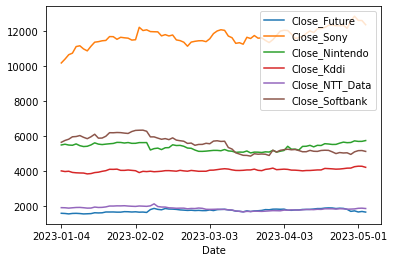

In [3]:
import matplotlib.pyplot as plt
plt.figure()
df_rank.iloc[::-1].plot()
plt.show()

In [4]:
df_rank.iloc[::-1].rank(axis=1,ascending=False)

,Close_Future,Close_Sony,Close_Nintendo,Close_Kddi,Close_NTT_Data,Close_Softbank
Date,,,,,,
2023-01-04,6.0,1.0,3.0,4.0,5.0,2.0
2023-01-05,6.0,1.0,3.0,4.0,5.0,2.0
2023-01-06,6.0,1.0,3.0,4.0,5.0,2.0
2023-01-10,6.0,1.0,3.0,4.0,5.0,2.0
2023-01-11,6.0,1.0,3.0,4.0,5.0,2.0
...,...,...,...,...,...,...
2023-04-27,6.0,1.0,2.0,4.0,5.0,3.0
2023-04-28,6.0,1.0,2.0,4.0,5.0,3.0
2023-05-01,6.0,1.0,2.0,4.0,5.0,3.0


<Figure size 432x288 with 0 Axes>

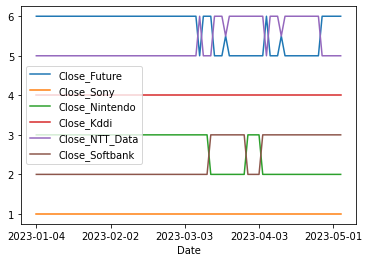

In [5]:
import matplotlib.pyplot as plt
plt.figure()
df_rank.iloc[::-1].rank(axis=1,ascending=False).plot()
plt.savefig("ranking.png")
plt.show()

In [23]:
from ipywidgets import interact

def func(year, month, day, num):
    dic = {4722:"Future", 6758:"Sony", 7974:"Nintendo", 9433:"Kddi", 9613:"NTT_Data", 9984:"Softbank"}
    if len(month) == 1:
        month = '0' + month
    if  len(day) == 1:
        day = '0' + day
    date = year + "-" + month + "-" + day
    row  = "Close_" + dic[num]
    if date not in df_rank.index:
        return "Don't Exist this data."
    return dic[num], df_rank.at[date, row]

interact(func, year="2023", month="4", day="3", num=[4722,6758,7974,9433,9613,9984])

interactive(children=(Text(value='2023', description='year'), Text(value='4', description='month'), Text(value…

<function __main__.func(year, month, day, num)>

In [22]:
from ipywidgets import interact

def func(date, company):
    row  = "Close_" + company
    return df_rank.at[date, row]

interact(func, date=list(df_rank.iloc[::-1].index), company=["Future","Sony","Nintendo","Kddi","NTT_Data","Softbank"])

interactive(children=(Dropdown(description='date', options=('2023-01-04', '2023-01-05', '2023-01-06', '2023-01…

<function __main__.func(date, company)>

# 1つの会社でデータを見る

<Figure size 432x288 with 0 Axes>

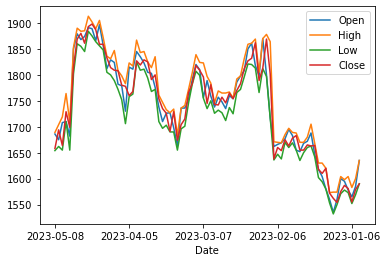

In [26]:
import matplotlib.pyplot as plt
plt.figure()
df[['Open', 'High', 'Low', 'Close']].plot()
plt.show()

In [10]:
df["Ave_High_Low"] = (df["High"] + df["Low"]) / 2
df["Ave_Open_Close"] = (df["Open"] - df["Close"]) / 2
df

,Open,High,Low,Close,Volume,Ave_High_Low,Ave_Open_Close
Date,,,,,,,
2023-05-08,5130,5138,5075,5120,6944300,5106.5,5.0
2023-05-02,5187,5213,5123,5170,8120100,5168.0,8.5
2023-05-01,5182,5219,5135,5163,10380100,5177.0,9.5
2023-04-28,5018,5103,4977,5094,10587700,5040.0,-38.0
2023-04-27,5053,5056,4948,4948,24461600,5002.0,52.5
...,...,...,...,...,...,...,...
2023-01-11,6038,6083,5948,5969,8738400,6015.5,34.5
2023-01-10,5916,6041,5896,5953,10823000,5968.5,-18.5
2023-01-06,5727,5867,5717,5816,10450400,5792.0,-44.5


In [6]:
df.iloc[::-1].diff()

,Open,High,Low,Close,Volume,Ave_High_Low,Ave_Open_Close
Date,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,-3.390,-2.2443,0.91,1.29,-23003838.0,-0.66715,-2.3400
2023-01-05,0.240,-0.8857,-0.32,-1.34,-8150925.0,-0.60285,0.7900
2023-01-06,-1.120,2.5200,0.13,4.60,6792007.0,1.32500,-2.8600
2023-01-09,4.455,3.1200,5.00,0.53,-16963902.0,4.06000,1.9625
...,...,...,...,...,...,...,...
2023-05-02,0.810,-0.1000,-1.10,-1.05,-4047240.0,-0.60000,0.9300
2023-05-03,-0.590,0.5700,-0.38,-1.09,16710322.0,0.09500,0.2500
2023-05-04,-4.610,-3.8800,-2.85,-1.66,16099409.0,-3.36500,-1.4750
